In [134]:
# Cargar los datos de entrenamiento
import numpy as np
train_matrix = np.load('../features/matriz_datos_train.npy')

# Seleccionar las features y target
X_train = train_matrix[:,:-1]
y_train = train_matrix[:, -1]

print(np.shape(X_train[0]))

(16,)


In [135]:
# Estandarización de los datos de entrenamiento
from sklearn.preprocessing import StandardScaler
estandarizador = StandardScaler()
estandarizador.fit(X_train)
mu = estandarizador.mean_
sigma = np.sqrt(estandarizador.var_)
X_train=estandarizador.transform(X_train)

print(X_train[0])
#print(X_train_new[0])

[-0.43226574 -0.43226574  0.43226574  0.17613115  0.18389278  0.6376569
 -0.49742942 -0.26505643  0.          0.35852753  0.         -0.17162313
  0.          0.12151457  0.24189279 -0.47630145]


In [136]:
# SELECCIÓN DE LOS ATRIBUTOS (CARACTERÍSTICAS)
from scipy.stats import kstest # Prueba de Kolmogorov-Smirnov

alpha = 0.01 # nivel de confianza del 99%
h_norm = np.zeros(X_train.shape[1])
for i in range(0, X_train.shape[1]):
    _, pvalue = kstest(X_train[:, i], 'norm')
    
    # Contraste de hipótesis
    if pvalue<=alpha:
        h_norm[i] = 0 # Los datos NO siguen una distribución normal N(0,1)
    else:
        h_norm[i] = 1 # Los datos SÍ siguen una distribución normal N(0,1)

print('0: no normal  ---- 1: sí normal: ', h_norm)

# Eliminamos las variables que no son discriminatorias.
id_no_disc = np.where(h_norm==0)
X_train_disc = np.delete(X_train, id_no_disc[0], axis=1)
mu_disc = np.delete(mu, id_no_disc[0])
sigma_disc = np.delete(sigma, id_no_disc[0])

#print(X_train_disc)
#print(np.shape(mu_disc))
#print(np.shape(sigma_disc))



0: no normal  ---- 1: sí normal:  [1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1.]


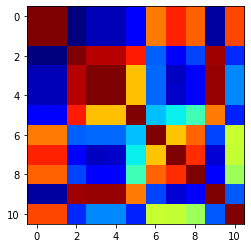

[1 2 3 4 9]
(320, 6)


In [137]:
# Realizamos un análisis de CORRELACIÓN para ver la dependencia entre pares de variables

R = np.corrcoef(X_train_disc.transpose())

import matplotlib.pyplot as plt
plt.imshow(R, cmap='jet')
plt.show()

th_cor = 0.9

idx = abs(R)>th_cor
mat_tri_sup = np.triu(idx,1)


row, col = np.where(mat_tri_sup==True)
id_corr = np.unique(col)
print(id_corr)


# Eliminamos las variables correlacionadas
X_final = np.delete(X_train_disc, id_corr, axis=1)
mu_final = np.delete(mu_disc, id_corr)
sigma_final = np.delete(sigma_disc, id_corr)

print(np.shape(X_final))

In [138]:
# Guardado de matriz final de características
import os
if not os.path.exists('../final_features'):
    os.mkdir('../final_features')

y_train_exp = np.expand_dims(y_train, axis=1)
train_matrix = np.concatenate((X_final, y_train_exp), axis=1)
np.save('../final_features/train.npy', train_matrix)

In [140]:
# Repetimos el proceso para la selección de las características del test

test_matrix = np.load('../features/matriz_datos_test.npy')

# Seleccionar las características y la clase
X_test = test_matrix[:,:-1]
y_test = test_matrix[:, -1]

# Eliminamos las características que no son discriminatorias durante entrenamiento
# id_no_disc
X_test_disc = np.delete(X_test, id_no_disc[0], axis=1)

# Eliminamos las características correladas durante entrenamiento
# id_corr
X_test_final = np.delete(X_test_disc, id_corr, axis=1)

# Estandarización de las características del test en base a la mu y la sigma del entrenamiento
X_test_final = (X_test_final-mu_final)/sigma_final

# Guardado de la matriz de datos de test
y_test_exp = np.expand_dims(y_test, axis=1)
test_matrix = np.concatenate((X_test_final, y_test_exp), axis=1)

np.save('../final_features/test.npy', test_matrix)
#es la selección final para el test
print(np.shape(X_test_final))

(80, 6)
